In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

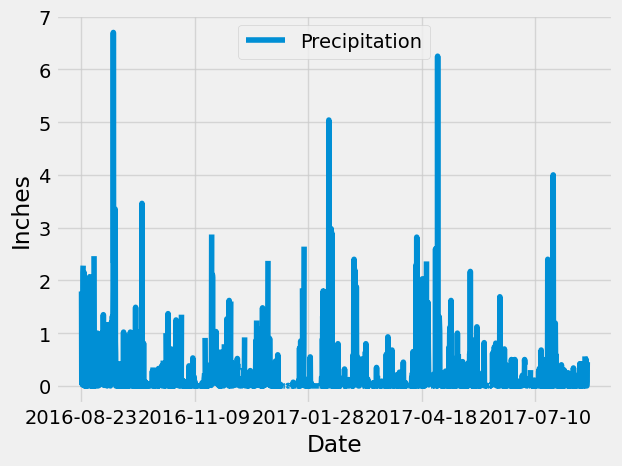

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df.sort_values(by='Date', inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
df = df.set_index("Date")
plot = df.plot()
plot.set_xlabel("Date")
plot.set_ylabel("Inches")
plt.grid(alpha=0.75)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = df["Precipitation"].count()
mean = df["Precipitation"].mean()
std = df["Precipitation"].std()
min = df["Precipitation"].min()
firstq = df["Precipitation"].quantile(0.25)
med = df["Precipitation"].median()
thirdq = df["Precipitation"].quantile(0.75)
max = df["Precipitation"].max()

summary = pd.DataFrame({"Summary":["count", "mean", "std", "min", "25%", "50%", "75%", "max"], 
                        "Precipitation":[count, mean, std, min, firstq, med, thirdq, max]})
summary

,Summary,Precipitation
0,count,2021.000000
1,mean,0.177279
2,std,0.461190
3,min,0.000000
4,25%,0.000000
5,50%,0.020000
6,75%,0.130000
7,max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Which station id has the greatest number of observations?
most_active = session.query(measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

print(f"The most active station is {most_active}")


The most active station is ('USC00519281',)


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

highest_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

average_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

print(f"lowest temp: {lowest_temp}, highest temp: {highest_temp}, average temp: {average_temp}")

lowest temp: [(54.0,)], highest temp: [(85.0,)], average temp: [(71.66378066378067,)]


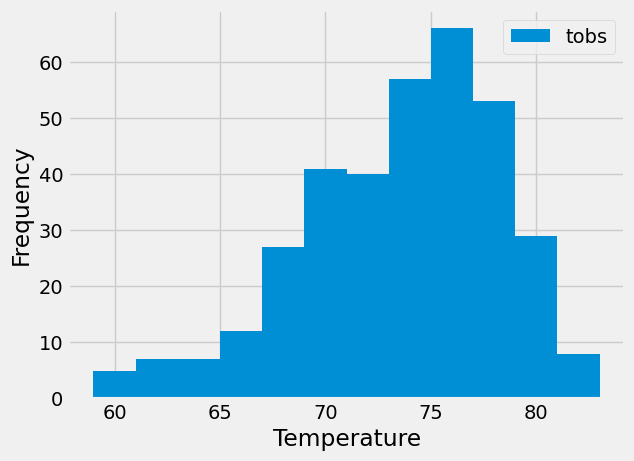

In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
temp = session.query(measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == "USC00519281").all()

# Save the query results as a Pandas DataFrame.
df = pd.DataFrame(temp, columns=['Temperature'])

# Plot the results as a histogram
plt.hist(df,bins=12,label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.show()

# Close Session

In [69]:
# Close Session
session.close()